## - Exercici 1:

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
# Hipótesi nula que les dades procedeixen d'una distribució normal
# Hipótess alternativa les dades NO procedeixen d'una distribució normal

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import f_oneway

In [3]:
df = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding='latin_1')

In [10]:
df.sort_values(by=['Rk'])

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [5]:
#escollim l'atribut punts del dataframe i visualitzem les dades estadístiques del mateix
df['Pts'].describe()

count    98.000000
mean     49.734694
std      16.166371
min      18.000000
25%      37.000000
50%      46.000000
75%      61.750000
max      90.000000
Name: Pts, dtype: float64

In [16]:
# per determinar si la mostra agafada té una distribució normal o no fem la prova de Shapiro-Wilk
scipy.stats.shapiro(df['Pts'])

(0.9720422029495239, 0.0346611924469471)

In [47]:
# el resultat ens dona un valor p de 0.03. donat que l'alfa es de 0.05, rebutjem l'hipotesi nula de que la mostra té una distribució normal.

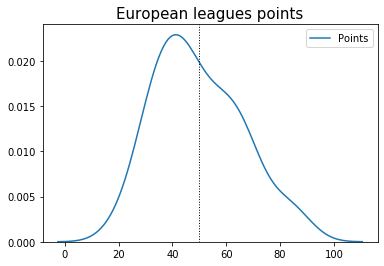

In [19]:
sns.kdeplot(df['Pts'], label= 'Points')
plt.axvline(x= df['Pts'].mean(), linewidth = 1, color= 'black', ls= 'dotted')
plt.title('European leagues points', size = 15)
plt.show()

In [ ]:
# Al gràfic anterior també podem visualitzar la confirmació que la mostra no té una distribució normal.

## - Exercici 2:

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [ ]:
# Hipótesi nula que hi ha una correlació entre les dues variables ranking i punts
# Hipótesi alternativa que NO hi ha cap correlació entre aquestes dues variables

In [20]:
scipy.stats.shapiro(df['Rk'])

(0.9547353386878967, 0.001963241258636117)

In [ ]:
''' Com hem vist a l'exercici anterior la variable punts no té una distribució normal. 
i com comprovem a la linia anterior la variable ranking tampoc té una distribució normal (valor p  de 0.0019 per sota del 0.05) 
Així doncs no podem fer servir la correlació de Pearson, que funciona millor amb variables amb distribucions normals, i
farem servir llavors el coeficient de correlació de Spearman.'''

In [21]:
rho, p_value = spearmanr (df['Pts'], df['Rk'])

In [22]:
print("The Spearman correlation coefficient is:", rho)
print("The p-value is:", p_value)

The Spearman correlation coefficient is: -0.9943014501449078
The p-value is: 3.790984733620942e-95


In [ ]:
''' Veiem que hi ha una correlació negativa entre ambdues variables de -0.99, gairebé perfecte. 
I donat que el valor p (3.398589707355742) es major que 0.05, es confirma que la hipótesis nula es verdadera
i hi ha una forta correlació entre la variable punts i la variable ranking.'''

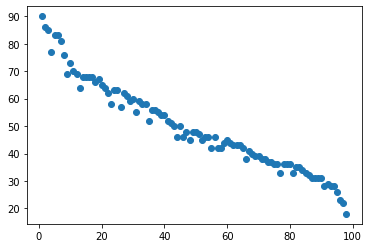

In [50]:
plt.scatter(df['Rk'],df['Pts'])
plt.show()

In [ ]:
# La gràfica anterior ve a confirmar visualment que hi ha correlació practicament perfecte entre les variables escollides.

## - Exercici 3:

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [ ]:
''' Hipótesi nula que el nombre d'assistencies (Attendance) dels 50 primers equips del ranking 
d'Espanya, Anglaterra i Alemania es similar.
Hipótesi alternativa que el nombre d'assistencies es diferent'''

In [19]:
# creem un dataframe per a cada pais d'entre els 50 primers posicionats al ranking
df_rk = df[df['Rk'] < 50]

data_esp = df_rk[df_rk['Country'] == 'ESP']
data_eng = df_rk[df_rk['Country'] == 'ENG']
data_ger = df_rk[df_rk['Country'] == 'GER']

In [21]:
# comprovem si la variable Attendance de cada pais té una distribució normal
scipy.stats.shapiro(data_esp['Attendance'])

(0.9812402725219727, 0.9687798023223877)

In [22]:
scipy.stats.shapiro(data_eng['Attendance'])

(0.8950594067573547, 0.19320356845855713)

In [23]:
scipy.stats.shapiro(data_ger['Attendance'])

(0.9410119652748108, 0.5643281936645508)

In [ ]:
'''Veiem que la distribució en els 3 casos supera el 0.05 i per tant podriem considerar que tenen una distribució
mes o menys normal.'''

In [ ]:
# Calculem la desviació de la variable Attendance de cada pais

In [37]:
data_ger['Attendance'].std()

9673.525231269105

In [38]:
data_esp['Attendance'].std()

12664.251001483326

In [39]:
data_eng['Attendance'].std()

14685.871549062233

In [ ]:
# Comprovem la homogeneitat de la variança calculant el ratio entre la mostra mes gran i la més petita

In [40]:
ratio = data_eng['Attendance'].std()/data_ger['Attendance'].std()
print (ratio)

1.5181509530353021


In [ ]:
'''Com que la relació entre la mostra mes gran i la mes petita es inferior a 2, en aques cas 1.51,
considerem que es cumpleix la suposició de desviacions estàndar iguals.'''

In [ ]:
'''com que la distribució de les dades es normal i la variança es homogenea, farem servir el test ANOVA per comparar les 
mitjanes d`assistencia dels tres païssos'''

In [ ]:
# H0: les mitjanes d'assistencia son totes iguals.
# Ha: al menys una de les mitjanes es diferent.

In [47]:
# realitzem el test ANOVA unidireccional
f_oneway (data_eng['Attendance'], data_ger['Attendance'], data_esp['Attendance'])

F_onewayResult(statistic=9.981936965380445, pvalue=0.000650809059718107)

In [ ]:
# Veiem que el valor p es de 0.00, així doncs com que està per sota de l'alfa de 0.05, rebutjem la hipotesi nula.

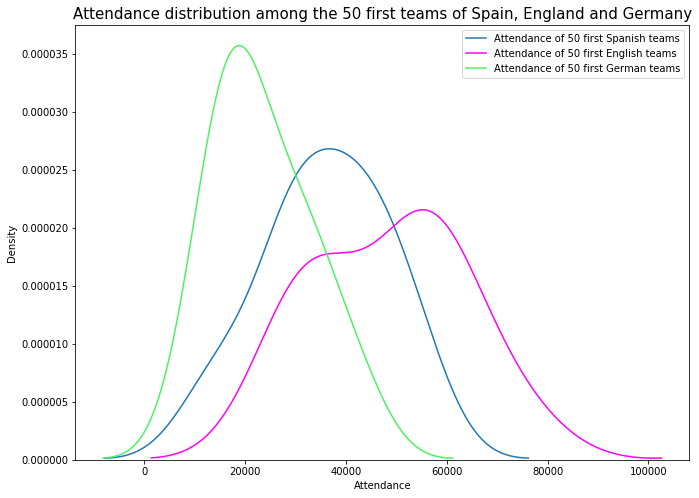

In [48]:
plt.figure(figsize= (11,8))

sns.kdeplot(data_esp['Attendance'],  label= 'Attendance of 50 first Spanish teams')
sns.kdeplot(data_eng['Attendance'], label= 'Attendance of 50 first English teams', color= 'magenta')
sns.kdeplot(data_ger['Attendance'], label= 'Attendance of 50 first German teams', color='#4cf163')
plt.title('Attendance distribution among the 50 first teams of Spain, England and Germany', fontsize = 15)
plt.xlabel('Attendance')
plt.ylabel('Density')
plt.show()

In [ ]:
'''En la gràfica anterior podem veure clarament com l`assistencia es molt diferent entre els equips de tots tres països, 
confirmant que l`hipotesi alternativa es la correcta'''